In [5]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the data as a pandas dataframe.
df_full = pd.read_csv('rideshare_kaggle.csv')

# Filter the df to only include rows where the 'name' column is 'UberX'
df_UberX = df_full[df_full['name'] == 'UberX']

In [8]:
## Generate training data

# Shuffle the dataframe
df_UberX = df_UberX.sample(frac=1, random_state=123)

# Calculate the sizes of validation and test sets
val_size = int(len(df_UberX) * 0.2)
test_size = int(len(df_UberX) * 0.1)

# Select rows based on the val_size and test_size to store as train set, val set, and test set
train_df = df_UberX.iloc[val_size + test_size:]
val_df = df_UberX.iloc[:val_size]
test_df = df_UberX.iloc[val_size:val_size + test_size]


In [11]:
# Review the first 5 rows of the training data. 
train_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
510728,43ead41d-0008-4f03-9cdb-097e99f14486,1.543802e+09,1,3,12,2018-12-03 01:48:00,America/New_York,Financial District,South Station,Uber,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
578628,72e36153-df00-4790-92a7-4748a9d96d31,1.543413e+09,13,28,11,2018-11-28 13:56:07,America/New_York,Beacon Hill,Boston University,Uber,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
76158,31ca9f85-bdcc-4bb5-9735-2c14766987f6,1.544776e+09,8,14,12,2018-12-14 08:20:06,America/New_York,Northeastern University,West End,Uber,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
249587,5c46d7a7-372d-49af-a040-8ca1b6bb003c,1.545025e+09,5,17,12,2018-12-17 05:40:07,America/New_York,Financial District,South Station,Uber,...,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
253866,9afd18eb-ecef-498d-ab78-d38dfb06eada,1.544845e+09,3,15,12,2018-12-15 03:35:05,America/New_York,Fenway,North Station,Uber,...,0.0000,1544806800,27.21,1544781600,46.63,1544814000,24.55,1544785200,43.84,1544817600


In [11]:
# Review the size of the training data. 
print(f'Number of observations: {train_df.shape[0]}')
print(f'Number of columns: {train_df.shape[1]}')

Number of observations: 38567
Number of columns: 57


#### **Data Description:**

**Y variable**: price

**Predictor variables**: ID, timestamp, hour, day, month, timezone, source, destination, cab type, distance, surge pricing indicator, and several weather conditions including temperature, weather summary, precipitation, humidity, wind speed, visibility, high and low temperatures, pressure, UV Index, sunrise and sunset times. 


In [13]:
#### Check for missing values:

train_df.isnull().sum()


id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [15]:
#### Check summary statistics:

summary_stats = train_df.describe()
summary_stats

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.856700e+04,38567.000000,38567.000000,38567.000000,38567.000000,38567.000000,38567.0,38567.000000,38567.000000,38567.000000,...,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,3.856700e+04,38567.000000,3.856700e+04
mean,1.544048e+09,11.535847,17.767184,11.588742,9.770062,2.198911,1.0,42.338243,-71.066064,39.546466,...,0.037219,1.544047e+09,33.435208,1.544044e+09,45.234340,1.544050e+09,29.690229,1.544051e+09,41.964895,1.544051e+09
std,6.901127e+05,6.931769,9.985999,0.492068,2.471197,1.183067,0.0,0.047786,0.020253,6.734046,...,0.055113,6.920673e+05,6.467204,6.910733e+05,5.643049,6.909396e+05,7.133120,6.879264e+05,6.932696,6.918583e+05
min,1.543204e+09,0.000000,1.000000,11.000000,6.000000,0.020000,1.0,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543445e+09,6.000000,13.000000,11.000000,8.000000,1.300000,1.0,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543738e+09,12.000000,17.000000,12.000000,9.500000,2.170000,1.0,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544830e+09,17.000000,28.000000,12.000000,10.500000,2.860000,1.0,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.330000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,44.000000,7.860000,1.0,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [17]:
#### Determine which columns are categorical:

cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
num_col = [col for col in train_df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 11
num_col = 46



#### Visualize Numerical Variables

In [19]:
# Remove 'id', the unique identifier from num_col. 
variables_to_exclude = ['id']
num_col = [col for col in num_col if col not in variables_to_exclude]

In [21]:
# Distinguish between continous and discrete numerical variables:
discrete_variables = ['hour','day','month','uvIndex']
continuous_variables = [col for col in num_col if col not in discrete_variables]

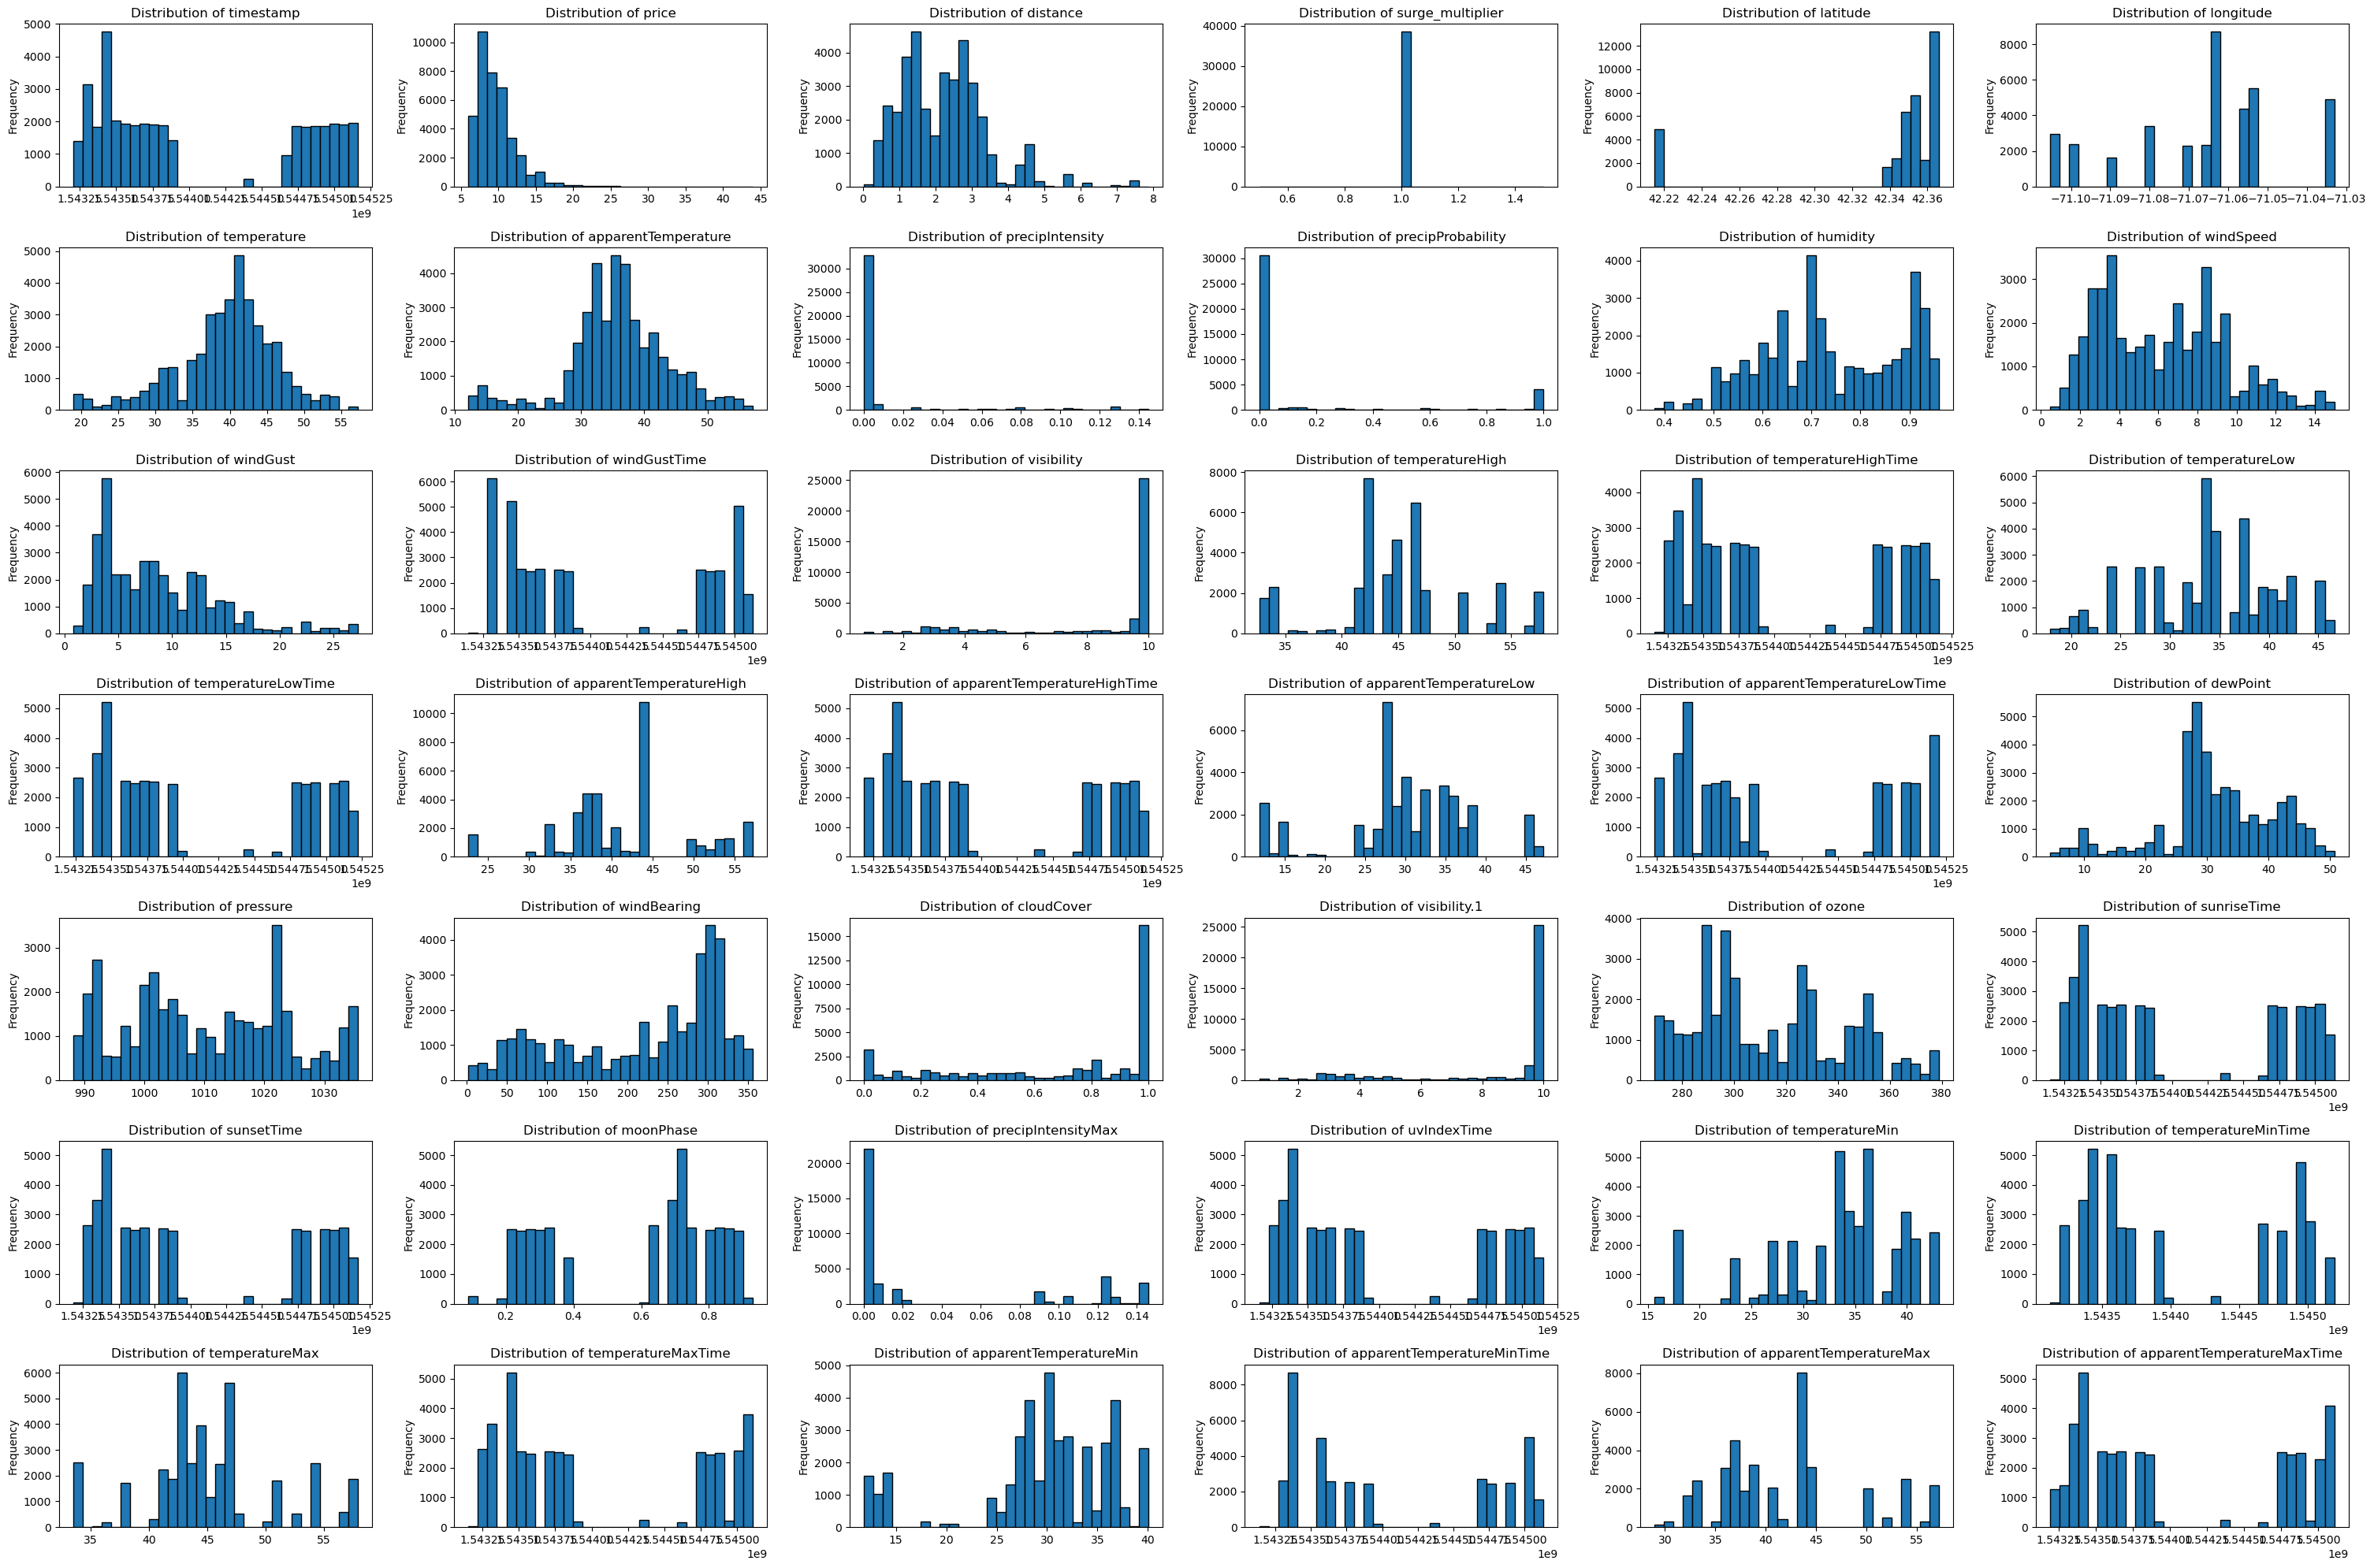

In [23]:
# Visualize Numerical Variables (continuous)
plt.figure(figsize=(30, 20))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(7, 6, i)
    plt.hist(train_df[col], bins=30, edgecolor='black')  # Plot histogram using matplotlib
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

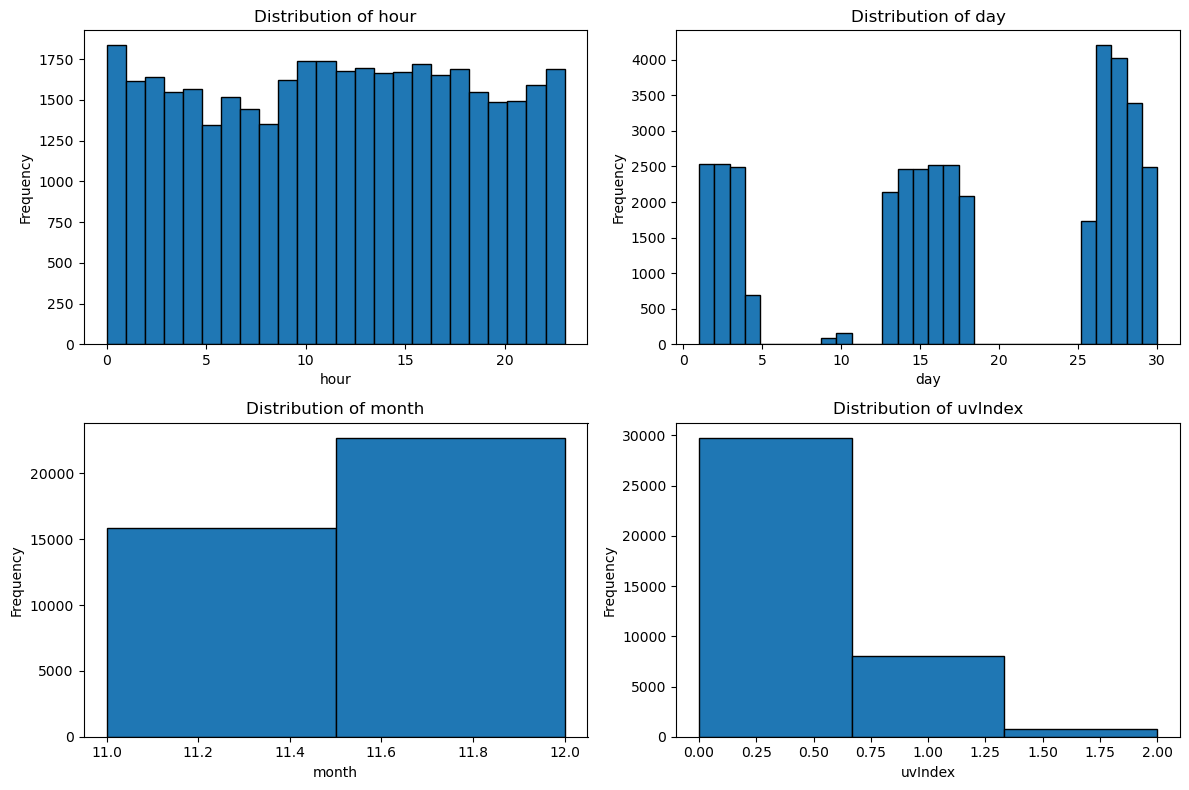

In [27]:
# Visualize Numerical Variables (discrete)
plt.figure(figsize=(12, 8))
for i, col in enumerate(discrete_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(train_df[col], bins=max(train_df[col]) - min(train_df[col]) + 1, edgecolor='black') 
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)  
plt.tight_layout()
plt.show()

#### Visualize Categorical Variables

In [ ]:
## needs to be written

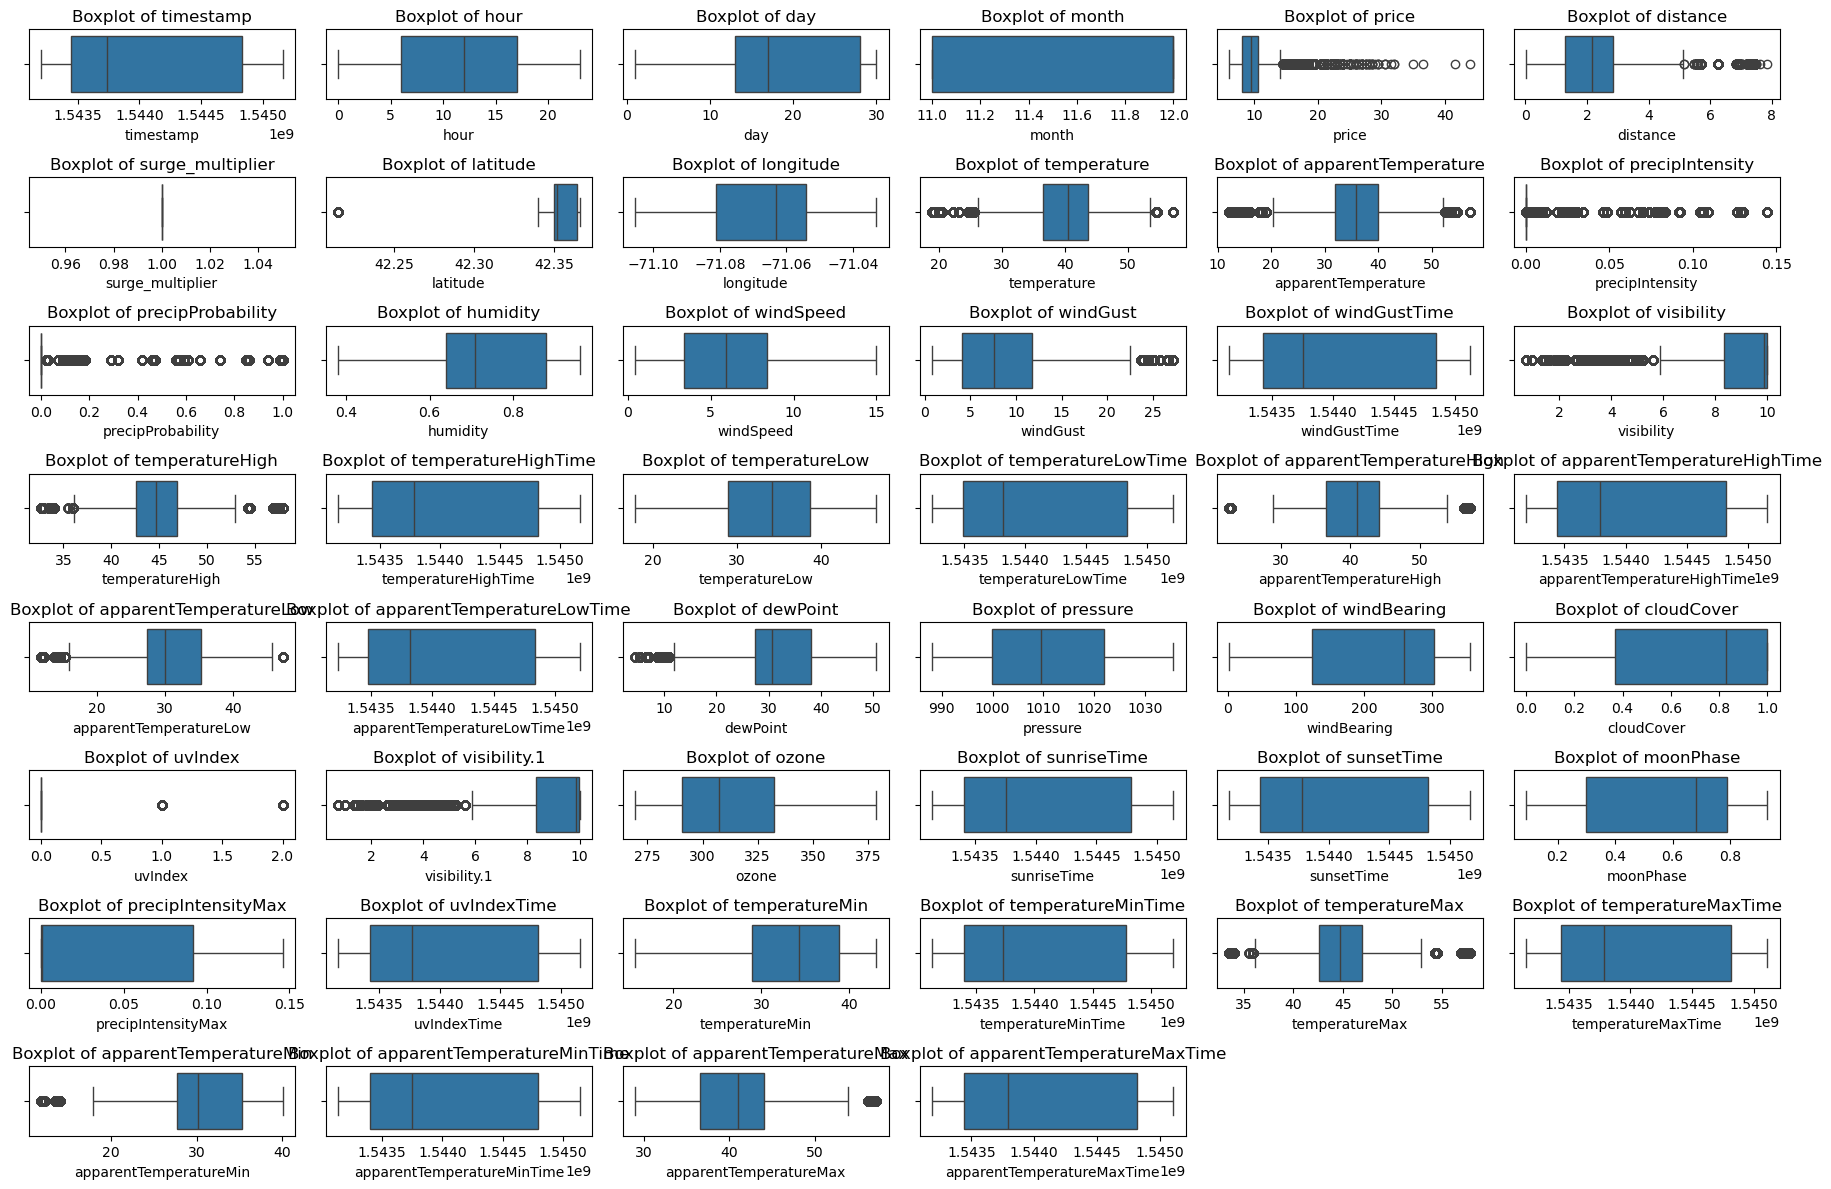

In [35]:
# Generate boxplots to detect outliers.
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(8, 6, i)
    sns.boxplot(x=df_UberX[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## boxplots are shown below, but there is an error with the for-loop that needs to be fixed

## Correlation Analysis

In [43]:
### Numeric columns:
numeric_train_df = train_df[num_col]

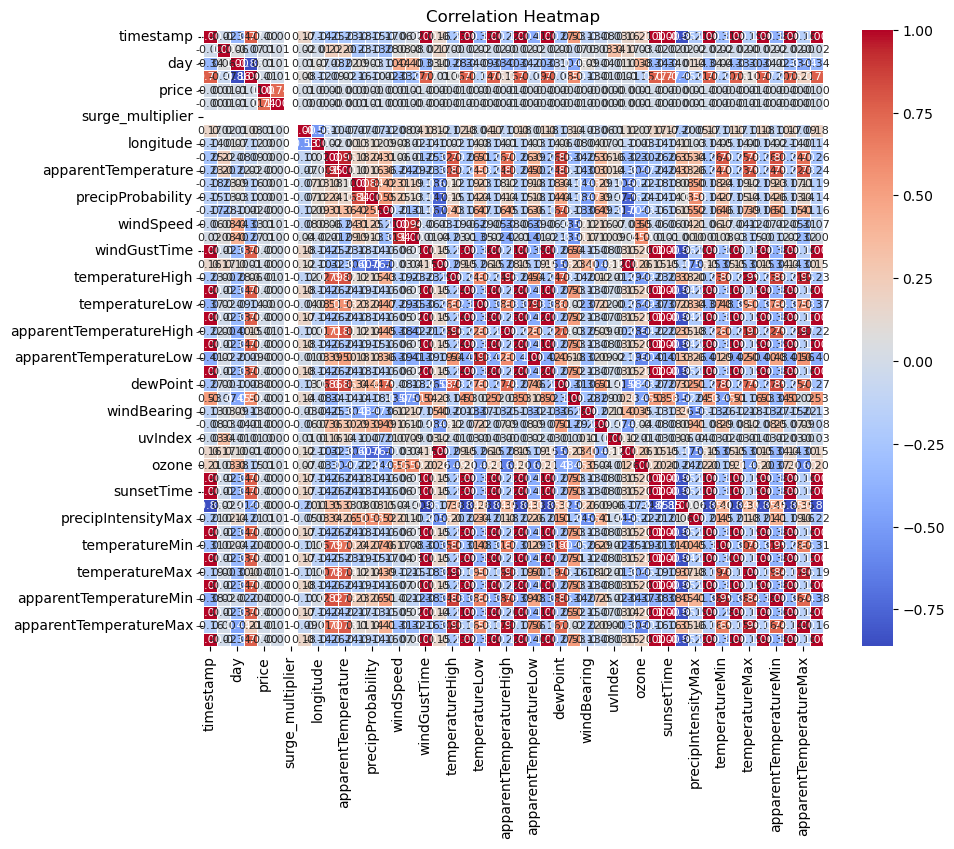

In [45]:
# Calculate correlation matrix
correlation_matrix = numeric_train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()



In [49]:
def high_correlation_variables(correlation_matrix, threshold=0.7):
    variables = []
    num_variables = correlation_matrix.shape[0]
    
    for i in range(num_variables):
        for j in range(i+1, num_variables):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                variables.append((correlation_matrix.index[i], correlation_matrix.columns[j]))
                
    return variables

high_corr_vars = high_correlation_variables(correlation_matrix, threshold=0.7)

# Print the pairs of variables
print("Pairs of variables with correlation coefficient > 0.7:")
for var1, var2 in high_corr_vars:
    print(f"Variable '{var1}' and Variable '{var2}'")

Pairs of variables with correlation coefficient > 0.7:
Variable 'timestamp' and Variable 'month'
Variable 'timestamp' and Variable 'windGustTime'
Variable 'timestamp' and Variable 'temperatureHighTime'
Variable 'timestamp' and Variable 'temperatureLowTime'
Variable 'timestamp' and Variable 'apparentTemperatureHighTime'
Variable 'timestamp' and Variable 'apparentTemperatureLowTime'
Variable 'timestamp' and Variable 'sunriseTime'
Variable 'timestamp' and Variable 'sunsetTime'
Variable 'timestamp' and Variable 'moonPhase'
Variable 'timestamp' and Variable 'uvIndexTime'
Variable 'timestamp' and Variable 'temperatureMinTime'
Variable 'timestamp' and Variable 'temperatureMaxTime'
Variable 'timestamp' and Variable 'apparentTemperatureMinTime'
Variable 'timestamp' and Variable 'apparentTemperatureMaxTime'
Variable 'day' and Variable 'month'
Variable 'month' and Variable 'windGustTime'
Variable 'month' and Variable 'temperatureHighTime'
Variable 'month' and Variable 'temperatureLowTime'
Variabl